### QED-C Application-Oriented Benchmarks - HamLib Simulation - Plot Observables Metrics

The notebook contains specific examples for the HamLib-based Hamiltonian Simulation benchmark program.
Configure and run the cell below with the desired execution settings.
Then configure and run the remaining cell(s), each one producing a plot illustrating benchmark results.


In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# Settings used when generating the datasets.
max_circuits =1
num_shots = 10000

K = 1             # number of Trotter steps
t = 0.1           # total evolution time

#backend_id="qasm_simulator"
backend_id="statevector_simulator"

api = "qiskit"

In [3]:
# Configure paths to common modules used in this benchmark
import sys
sys.path.insert(1, "_common")

# Configure benchmark library modules
import hamlib_simulation_benchmark
import metric_plots

### Load Metrics Data File for the Given Hamiltonian
Here we load the Hamiltonian benchmark data file and extract the metrics of interest. 

In [4]:
# List of HamLib filename and parameter tuples
hamiltonians = [
    ('condensedmatter/tfim/tfim', { "1D-grid": "pbc", "h": 2 }),
    ('condensedmatter/heisenberg/heis', { "1D-grid": "pbc", "h": 2 }),
    ('condensedmatter/fermihubbard/FH_D-1', { "1D-grid": "pbc", "enc": "bk", "U":12 }),
    ('condensedmatter/bosehubbard/BH_D-1_d-4', { "1D-grid": "nonpbc", "enc": "gray", "U":10 }),
    ('binaryoptimization/max3sat/random/random_max3sat-hams', { "ratio": "2", "rinst": "02" }),
    ('chemistry/electronic/standard/H2', { "ham_BK": "" })
    ]

############

# Select one of the Hamiltonians
hamiltonian_name, hamiltonian_params = hamiltonians[ 3 ]

# Select a backend on which the benchmark was executed
backend_id="statevector_simulator"

# Construct benchmark data file name and load the metrics 
app_name = f"HamLib-obs-{hamiltonian_name}"
app_name = app_name.replace("/", "_")

metrics_array = hamlib_simulation_benchmark.load_app_metrics(app_name, backend_id)

############
# DEVNOTE: some of the code below may be move to convenience functions

data_none = hamlib_simulation_benchmark.query_dict_array(metrics_array, dict(group_method=None))
data_simple = hamlib_simulation_benchmark.query_dict_array(metrics_array, dict(group_method="simple"))
data_N = hamlib_simulation_benchmark.query_dict_array(metrics_array, dict(group_method="N"))

# pull groups list from the "simple" dataset
groups = [m["group"] for m in data_simple]

# pull exact values and times from the "simple" dataset; remove null values
exp_values_exact = [m["exp_value_exact"] for m in data_simple]
exp_values_exact = [x for x in exp_values_exact if x is not None]
exp_times_exact = [m["exp_time_exact"] for m in data_simple]
exp_times_exact = [x for x in exp_times_exact if x is not None]

# pull "simple" values and times
exp_values_simple = [m["exp_value_computed"] for m in data_simple]
exp_times_simple = [m["exp_time_computed"] for m in data_simple]

# pull "None" values and times
exp_values_none = [m["exp_value_computed"] for m in data_none]
exp_times_none = [m["exp_time_computed"] for m in data_none]

# pull "N" values and times
exp_values_N = [m["exp_value_computed"] for m in data_N]
exp_times_N = [m["exp_time_computed"] for m in data_N]

##########################
# pull from nvidia backend

backend_id_2 = "nvidia"
metrics_array = hamlib_simulation_benchmark.load_app_metrics(app_name, backend_id_2)

data_nvidia = hamlib_simulation_benchmark.query_dict_array(metrics_array, dict(group_method=None))

# pull groups list from the "nvidia" dataset which is the largest
groups = [m["group"] for m in data_nvidia]

exp_values_nvidia = [m["exp_value_computed"] for m in data_nvidia]
exp_times_nvidia = [m["exp_time_computed"] for m in data_nvidia]

#print("")


### Regenerate HamLib Benchmark Standard Plot
Here we invoke the same function that the benchmark uses to generate its plot.  We pass in the metrics of interest.

----- Expectation Value Plot -----


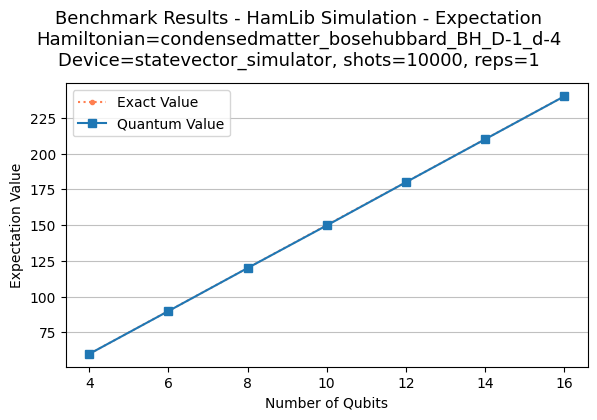

----- Expectation Time Plot -----


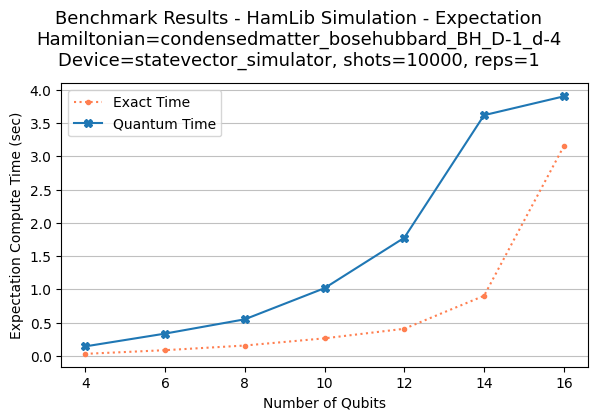

In [5]:
#### expectation value and time plots
benchmark_name = "HamLib Simulation"

options = { "ham": hamiltonian_name.replace("/", "_"), "gm": "?", "shots":num_shots, "reps": max_circuits  }

suptitle = f"Benchmark Results - {benchmark_name} - Expectation"

hamlib_simulation_benchmark.plot_from_data(suptitle, data_N, backend_id, options)



### Regenerate the Plots using Plot Functions
This example uses functions from the metric_plots module.

----- Expectation Value Plot -----


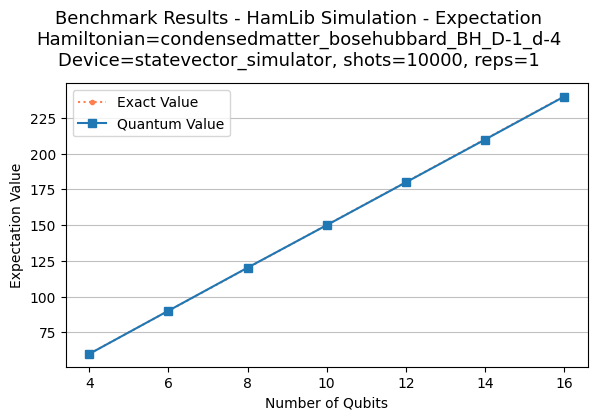

----- Expectation Time Plot -----


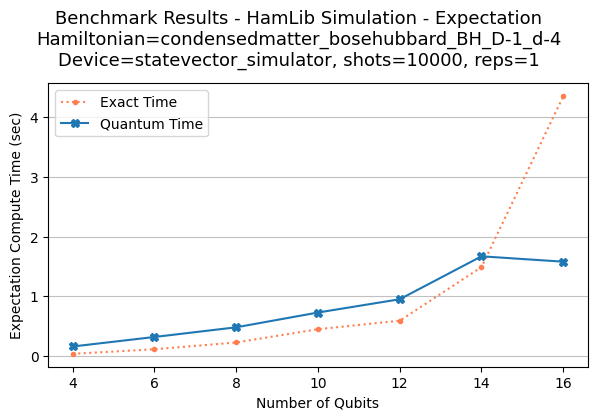

In [6]:
#### expectation value and time plots, using individual functions
benchmark_name = "HamLib Simulation"

options = { "ham": hamiltonian_name.replace("/", "_"), "shots":num_shots, "reps":max_circuits  }

suptitle = f"Benchmark Results - {benchmark_name} - Expectation"

exp_values = exp_values_simple
exp_times = exp_times_simple

# plot all line metrics, including solution quality and accuracy ratio
# vs iteration count and cumulative execution time
metric_plots.plot_expectation_value_metrics(
    suptitle,
    backend_id=backend_id,
    options=options,
    
    groups=groups,
    expectation_values_exact=exp_values_exact,
    expectation_values_computed=exp_values,   
)

# expectation time plot
# plot all line metrics, including solution quality and accuracy ratio
# vs iteration count and cumulative execution time
metric_plots.plot_expectation_time_metrics(
    suptitle,
    backend_id=backend_id,
    options=options,
    
    groups=groups,
    expectation_times_exact=exp_times_exact,
    expectation_times_computed=exp_times,
)


### Produce Multiple Plots from Multiple Datasets
Here, we combine data from several sources.  (so far, we pull all data from a single data file, but this will be enhanced)

[59.3114, 87.8303, 117.9194, 146.7342, 172.1975, 200.4575, 235.2344, 264.0975, 293.319, 350.1251]
----- Expectation Value Plot -----


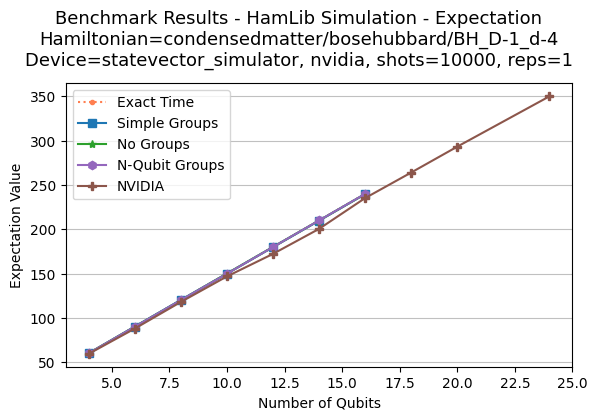

----- Expectation Time Plot -----


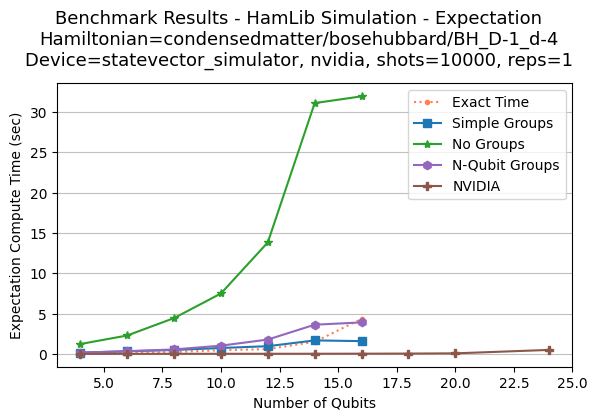

In [7]:
#### expectation value plot
benchmark_name = "HamLib Simulation"
method = 4
options = { "ham": hamiltonian_name.replace("/", "_"), "gm": "?", "shots": "?", "reps": 1  }

suptitle = f"Benchmark Results - {benchmark_name} - Expectation"
suptitle += f"\nHamiltonian={hamiltonian_name}"
#suptitle += f"\n{hamiltonian_params}"
suptitle += f"\nDevice={backend_id}{(', ' + backend_id_2) if backend_id_2 else ''}"
suptitle += f", shots={num_shots}, reps={max_circuits}"

# include nvidia data in the plot
labels = [ "Exact Time", "Simple Groups", "No Groups", "N-Qubit Groups", "NVIDIA" ]
values = [ exp_values_exact, exp_values_simple, exp_values_none, exp_values_N, exp_values_nvidia]
times = [ exp_times_exact, exp_times_simple, exp_times_none, exp_times_N, exp_times_nvidia]

print(exp_values_nvidia)


# plot all line metrics, including solution quality and accuracy ratio
# vs iteration count and cumulative execution time
metric_plots.plot_expectation_value_metrics_2(
    suptitle,
    backend_id=backend_id,
    options=options,
    
    groups = groups,
    labels = labels,
    values = values  
)

# expectation time plot
# plot all line metrics, including solution quality and accuracy ratio
# vs iteration count and cumulative execution time
metric_plots.plot_expectation_time_metrics_2(
    suptitle,
    backend_id=backend_id,
    options=options,
    
    groups = groups,
    labels = labels,
    times = times
)

